## Regression

In [1]:
from robingrad import Tensor, draw_dot
import robingrad.nn as nn
from robingrad.optim import SGD, Adam
from robingrad.state import get_parameters
from sklearn.datasets import make_regression
import numpy as np
import time
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Dataset

In [2]:
X, y = make_regression(n_samples=200, n_features=5, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0:5])

(200, 5)
(200,)
[0.95927083 0.02451017 0.49799829 1.45114361 2.15318246]
[172.54436082 -52.9529574   -4.14935233 193.99958991 -66.96262773]


In [3]:
X_train = Tensor(X, requires_grad=True)
print(type(X_train), X_train.shape)
y_train = Tensor(y, requires_grad=True)
print(type(y_train), y_train.shape)

<class 'robingrad.tensor.Tensor'> (200, 5)
<class 'robingrad.tensor.Tensor'> (200,)


### Model

In [4]:
class RobinNet:
    def __init__(self):
        self.l1 = nn.Linear(5,16)
        self.l2 = nn.Linear(16,1)
    def __call__(self, x):
        x = self.l1(x)
        x = x.relu()
        x = self.l2(x)
        return x
        
model = RobinNet()

In [5]:
res = model(X_train[0].reshape((1,5)))
res

Tensor: __add__
data: 
[[-2.0790012]]
grad: 
[[0.]]
dtype: float32

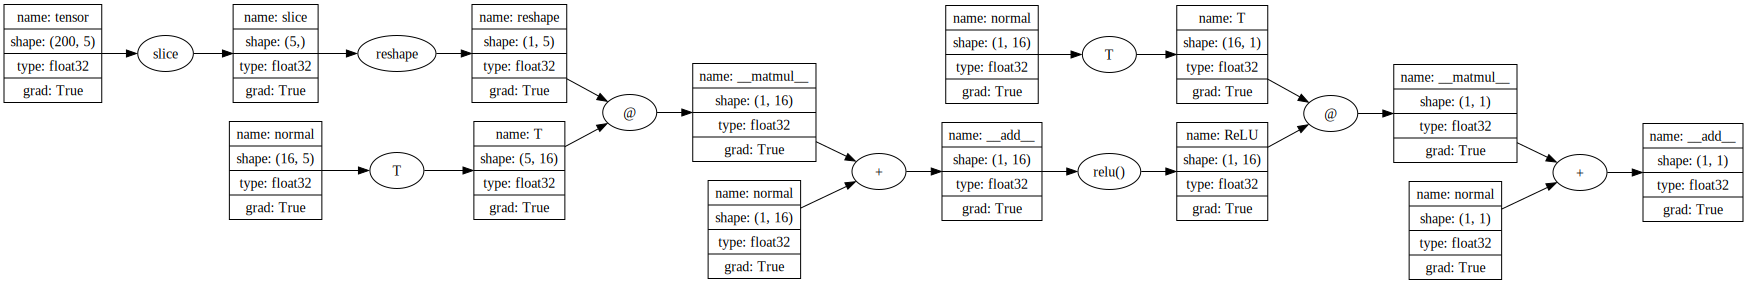

In [6]:
draw_dot(res)

### Full batch Stochastic Gradient Descent

In [7]:
params = get_parameters(model)
print(len(params), type(params))
opt = SGD(params)

4 <class 'list'>


In [8]:
epochs = 100
for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for i in range(X_train.shape[0]):
        output = model(X_train[i].reshape((1,5)))
        y_pred.append(float(output.data[0]))
        target = y_train[i].reshape((1,1))
        loss = (output-target)**2
        losses.append(float(loss.data[0]))
        opt.zero_grad()
        loss.backward()
        opt.step()
    e = time.monotonic()
    t = e - s
    loss_epoch = sum(losses)/ len(losses)
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"epoch: {epoch} | loss: {loss_epoch:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")

epoch: 0 | loss: 2205.42 | R2: 0.76 | time: 0.07 sec.
epoch: 10 | loss: 4.33 | R2: 1.00 | time: 0.05 sec.
epoch: 20 | loss: 1.81 | R2: 1.00 | time: 0.05 sec.
epoch: 30 | loss: 1.17 | R2: 1.00 | time: 0.05 sec.
epoch: 40 | loss: 0.90 | R2: 1.00 | time: 0.05 sec.
epoch: 50 | loss: 0.71 | R2: 1.00 | time: 0.05 sec.
epoch: 60 | loss: 0.58 | R2: 1.00 | time: 0.05 sec.
epoch: 70 | loss: 0.49 | R2: 1.00 | time: 0.05 sec.
epoch: 80 | loss: 0.42 | R2: 1.00 | time: 0.05 sec.
epoch: 90 | loss: 0.37 | R2: 1.00 | time: 0.05 sec.
epoch: 99 | loss: 0.33 | R2: 1.00 | time: 0.05 sec.


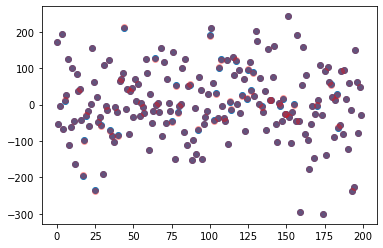

In [9]:
x = [i for i in range(len(X))]
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()

### Full batch Adam

In [10]:
model = RobinNet()
params = get_parameters(model)
opt = Adam(params)

In [11]:
epochs = 100
for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for i in range(X_train.shape[0]):
        output = model(X_train[i].reshape((1,5)))
        y_pred.append(float(output.data[0]))
        target = y_train[i].reshape((1,1))
        loss = (output-target)**2
        losses.append(float(loss.data[0]))
        opt.zero_grad()
        loss.backward()
        opt.step()
    e = time.monotonic()
    t = e - s
    loss_epoch = sum(losses)/ len(losses)
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"epoch: {epoch} | loss: {loss_epoch:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")

epoch: 0 | loss: 8873.77 | R2: 0.03 | time: 0.07 sec.
epoch: 10 | loss: 5719.29 | R2: 0.37 | time: 0.06 sec.
epoch: 20 | loss: 2054.06 | R2: 0.77 | time: 0.06 sec.
epoch: 30 | loss: 468.46 | R2: 0.95 | time: 0.06 sec.
epoch: 40 | loss: 168.37 | R2: 0.98 | time: 0.06 sec.
epoch: 50 | loss: 105.16 | R2: 0.99 | time: 0.06 sec.
epoch: 60 | loss: 82.14 | R2: 0.99 | time: 0.06 sec.
epoch: 70 | loss: 68.50 | R2: 0.99 | time: 0.06 sec.
epoch: 80 | loss: 57.53 | R2: 0.99 | time: 0.06 sec.
epoch: 90 | loss: 47.17 | R2: 0.99 | time: 0.06 sec.
epoch: 99 | loss: 39.19 | R2: 1.00 | time: 0.06 sec.


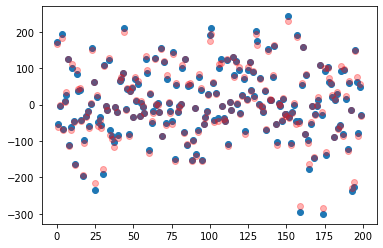

In [12]:
x = [i for i in range(len(X))]
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()

### Real data

In [13]:
X = pd.read_csv("data/x.csv", sep=";")
print(X.shape)
X.head()

(414, 6)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [14]:
Xn = X.to_numpy().tolist()
X_train = Tensor(Xn, requires_grad=True)
print(type(X_train), X_train.shape)

<class 'robingrad.tensor.Tensor'> (414, 6)


In [15]:
y = pd.read_csv("data/y.csv", sep=";")
y = y.to_numpy().squeeze()
y_train = Tensor(y, requires_grad=True)
print(type(y_train), y_train.shape)

<class 'robingrad.tensor.Tensor'> (414,)


In [16]:
class RobinNet:
    def __init__(self):
        self.l1 = nn.Linear(6,16)
        self.l2 = nn.Linear(16,1)
    def __call__(self, x):
        x = self.l1(x)
        x = x.relu()
        x = self.l2(x)
        return x
        
model = RobinNet()

In [17]:
res = model(X_train[0].reshape((1,6)))
res

Tensor: __add__
data: 
[[4.610097]]
grad: 
[[0.]]
dtype: float32

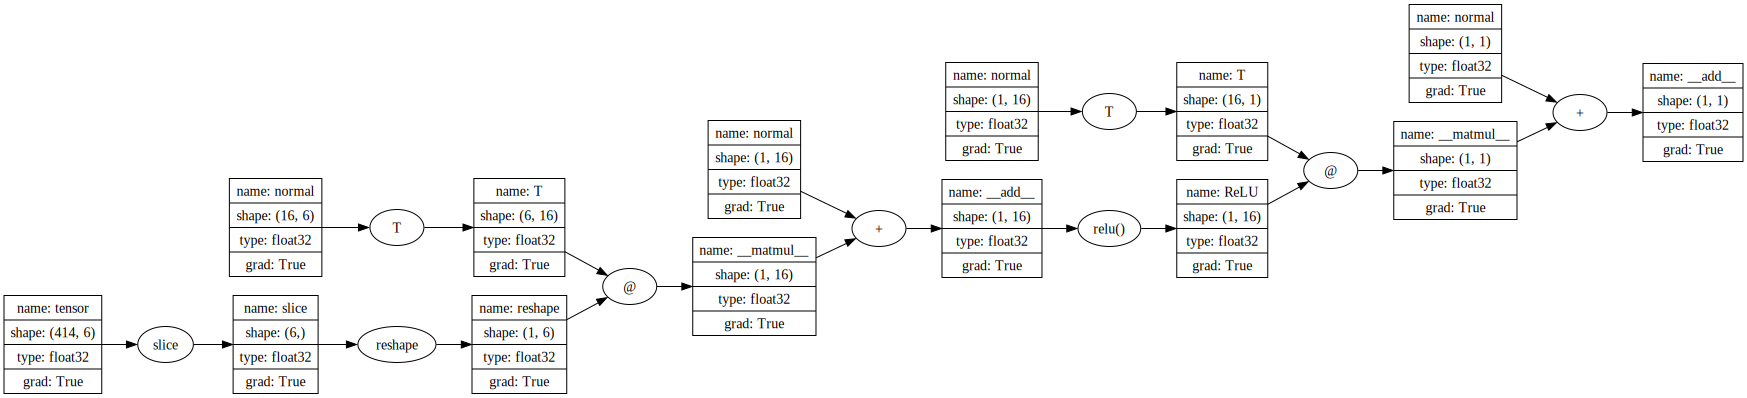

In [18]:
draw_dot(res)

In [19]:
params = get_parameters(model)
opt = Adam(params)

In [20]:
epochs = 100
for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for i in range(X_train.shape[0]):
        output = model(X_train[i].reshape((1,6)))
        y_pred.append(float(output.data[0]))
        target = y_train[i].reshape((1,1))
        loss = (output-target)**2
        losses.append(float(loss.data[0]))
        opt.zero_grad()
        loss.backward()
        opt.step()
    e = time.monotonic()
    t = e - s
    loss_epoch = sum(losses)/ len(losses)
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"epoch: {epoch} | loss: {loss_epoch:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")

epoch: 0 | loss: 1182.84 | R2: -5.40 | time: 0.15 sec.
epoch: 10 | loss: 74.89 | R2: 0.59 | time: 0.12 sec.
epoch: 20 | loss: 61.88 | R2: 0.66 | time: 0.13 sec.
epoch: 30 | loss: 58.91 | R2: 0.68 | time: 0.13 sec.
epoch: 40 | loss: 57.25 | R2: 0.69 | time: 0.13 sec.
epoch: 50 | loss: 56.07 | R2: 0.70 | time: 0.12 sec.
epoch: 60 | loss: 55.11 | R2: 0.70 | time: 0.12 sec.
epoch: 70 | loss: 54.32 | R2: 0.71 | time: 0.13 sec.
epoch: 80 | loss: 53.78 | R2: 0.71 | time: 0.12 sec.
epoch: 90 | loss: 53.32 | R2: 0.71 | time: 0.12 sec.
epoch: 99 | loss: 52.91 | R2: 0.71 | time: 0.13 sec.


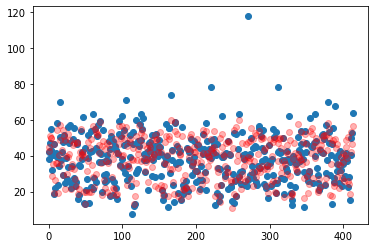

In [21]:
x = [i for i in range(len(X))]
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()